In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 17 ##

## Alameda County Jury Panels ##

In [2]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


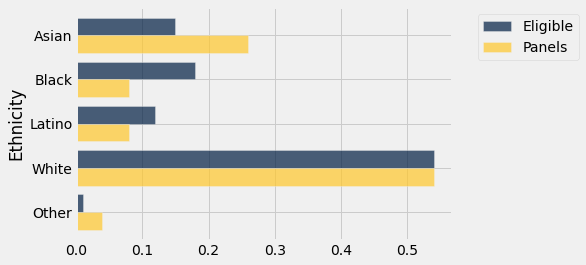

In [3]:
jury.barh('Ethnicity')

In [4]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [5]:
help(sample_proportions)

Help on function sample_proportions in module datascience.util:

sample_proportions(sample_size, probabilities)
    Return the proportion of random draws for each outcome in a distribution.
    
    This function is similar to np.random.multinomial, but returns proportions
    instead of counts.
    
    Args:
        ``sample_size``: The size of the sample to draw from the distribution.
    
        ``probabilities``: An array of probabilities that forms a distribution.
    
    Returns:
        An array with the same length as ``probability`` that sums to 1.



In [12]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

array([0.15179199, 0.18763176, 0.10962755, 0.54111033, 0.00983837])

In [13]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.151792
Black,0.18,0.08,0.187632
Latino,0.12,0.08,0.109628
White,0.54,0.54,0.54111
Other,0.01,0.04,0.00983837


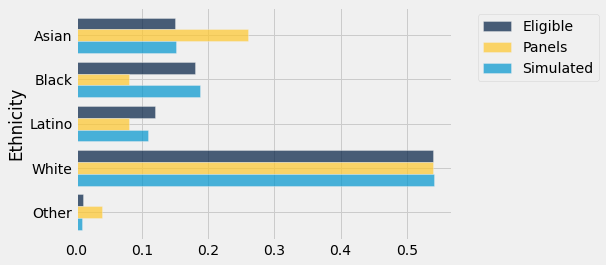

In [14]:
jury_with_simulated.barh('Ethnicity')
# what information can you extract from the barchart below?
# were we ever able to simulate what actually happened? (in yellow)
# does this mean our model--our jury panel was selected at random--was a good one?



## Distance Between Distributions

In [16]:
# In the last lecture, the difference between observed black(non-purple)/purple flowers
# and their expected values (25%/75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
diffs
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


## Total Variation Distance

In [17]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [18]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14

In [19]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.014125087842586112

In [ ]:
# what do the two numbers above mean?
# what they tell us about our observed panel, and our simulation?

# our simulation has a smaller distance from the eligible population
# whereas our observed panel (what actually happened) has a greater distance from the 
# eligible population

# our simulations give us numbers closer to our eligible population
# it seems that our simulation is a better representation of the population
# rather than our observed panel

In [20]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations): # np.arange(10,000) = (0, 1....9,999), i = 0, 1....9,999
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

Observed TVD: 0.14


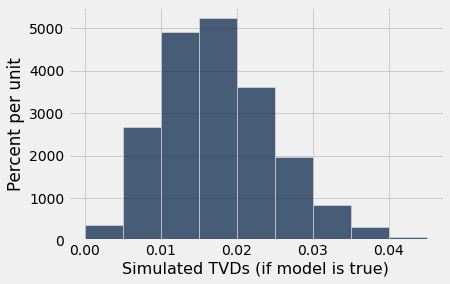

In [21]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))

In [22]:
# what information can you extract from the above distribution?
# where is it centered? 0.01-0.02
# what is its width? 0.045

# how does it compare with the observed TVD above? 
# our distribution does not capture the observed TVD, as it only goes from 0.00-0.045

# what does this say about our model? 
# our jury panel was selected at random
# we have evidence against our model, since we were never able to simulate the observed TVD
# or what actually happened

# were we ever able to simulate the observed panel?
#no